In [ ]:
pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 38.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
pip install joblib

In [ ]:
pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Change the name of the train file and test file
df = pd.read_csv('SMOTE Train Part 2 MESocSentiment.csv')
df.head()

df2 = pd.read_csv('Test Part 2 Ground Truth.csv')
df2.head()

df2.drop(['Sentiment (MESocSentiment)'], axis = 1, inplace = True)
df2.head()

,Tweets,Sentiment (Manual)
0,new post pocketimes youtube abang,NEUTRAL
1,merdeka motherfuckers,NEGATIVE
2,waiting bunga api kalau ada hahahah,NEUTRAL
3,random pics places kl took using ig filters se...,POSITIVE
4,kim pangon malaysia try new players chiangmai,NEUTRAL


In [ ]:
df.head()

,Tweets,Sentiment (All)
0,dost karde bamszlk g kutluyoruz happy malaysia...,POSITIVE
1,malaysia face vietnam group b aff cup,NEUTRAL
2,whitebrowed crake poliolimnas cinereus baram w...,NEUTRAL
3,burmese pool taiping perak malaysia vivo x pro...,NEUTRAL
4,no comments penang malayasia,NEUTRAL


In [ ]:
df2.head()

,Tweets,Sentiment (Manual)
0,new post pocketimes youtube abang,NEUTRAL
1,merdeka motherfuckers,NEGATIVE
2,waiting bunga api kalau ada hahahah,NEUTRAL
3,random pics places kl took using ig filters se...,POSITIVE
4,kim pangon malaysia try new players chiangmai,NEUTRAL


In [ ]:
X_train = df['Tweets']
y_train = df['Sentiment (All)']

X_test = df2['Tweets']
y_test = df2['Sentiment (Manual)']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect= TfidfVectorizer(max_features = None)
tfidf_vect.fit(df['Tweets'])
X_train_tfidf_vect = tfidf_vect.transform(df['Tweets'])
X_test_tfidf_vect = tfidf_vect.transform(df2['Tweets'])

In [ ]:
tfidf_vect

TfidfVectorizer()

In [ ]:
print(X_train_tfidf_vect)

  (0, 1018)	0.37461424850678915
  (0, 3029)	0.37461424850678915
  (0, 3598)	0.37461424850678915
  (0, 5259)	0.1641914070737732
  (0, 5892)	0.2049314591133541
  (0, 6585)	0.37461424850678915
  (0, 7171)	0.37461424850678915
  (0, 7913)	0.23252544876531298
  (0, 8457)	0.18697909904440602
  (0, 12006)	0.37461424850678915
  (1, 186)	0.46177845912657695
  (1, 2879)	0.39051351239191917
  (1, 4178)	0.43861958399552986
  (1, 5060)	0.38800470663714703
  (1, 7876)	0.2084168319671432
  (1, 14583)	0.49788300196110336
  (2, 988)	0.25833836178779873
  (2, 1066)	0.3580847893775331
  (2, 2354)	0.3580847893775331
  (2, 2783)	0.34296083729104454
  (2, 5698)	0.2882660901288355
  (2, 10202)	0.25027318461942444
  (2, 10388)	0.3580847893775331
  (2, 11738)	0.228233644951486
  (2, 14847)	0.3239069110618941
  :	:
  (10861, 11684)	0.2022098074801047
  (10861, 12904)	0.21840695809098
  (10861, 13539)	0.1734646351858825
  (10861, 13540)	0.21840695809098
  (10861, 13551)	0.16749225134627088
  (10861, 14586)	0.1527

In [ ]:
print(X_test_tfidf_vect)

  (0, 16)	0.4164015525405518
  (0, 9136)	0.29710568640296675
  (0, 10370)	0.6141448124872567
  (0, 10449)	0.44764294433262475
  (0, 15216)	0.4009736921956988
  (1, 8457)	0.41273355335247397
  (1, 8771)	0.9108518067924334
  (2, 108)	0.40158635586337
  (2, 590)	0.4443594414353197
  (2, 1857)	0.45662791109864875
  (2, 5171)	0.5672242243150554
  (2, 6527)	0.33319771269853843
  (3, 417)	0.3022474938708352
  (3, 5780)	0.27211866017626646
  (3, 6963)	0.24485991207013813
  (3, 7876)	0.14585823011753002
  (3, 8457)	0.1913883508984041
  (3, 10231)	0.4409961427110339
  (3, 10300)	0.3136322937489061
  (3, 10956)	0.38344822288255814
  (3, 11983)	0.1994836381297208
  (3, 13936)	0.38344822288255814
  (3, 14451)	0.300059613789967
  (4, 2266)	0.5313009493620704
  (4, 6913)	0.374501041767118
  :	:
  (1997, 4073)	0.2563312841757465
  (1997, 4323)	0.27895437144091495
  (1997, 4835)	0.25464372209069974
  (1997, 5520)	0.2563312841757465
  (1997, 6349)	0.3531745547669218
  (1997, 7030)	0.29353529293529756
  

In [ ]:
print(X_train_tfidf_vect.shape)
print(X_test_tfidf_vect.shape)

(10863, 15321)
(2000, 15321)


In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=0, decision_function_shape='ovr' )
model.fit(X_train_tfidf_vect, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
#To save the SVM model
import joblib

# Using joblib
joblib.dump(model, 'support_vector_machine_model_joblib.pkl')

['support_vector_machine_model_joblib.pkl']

In [ ]:
from sklearn.metrics import accuracy_score

predictions_SVM = model.predict(X_test_tfidf_vect)
test_prediction_SVM = pd.DataFrame()
test_prediction_SVM['Tweets'] = X_test
test_prediction_SVM['Sentiment'] = predictions_SVM

SVM_accuracy = accuracy_score(predictions_SVM, y_test)

In [ ]:
test_prediction_SVM

,Tweets,Sentiment
0,new post pocketimes youtube abang,NEUTRAL
1,merdeka motherfuckers,NEUTRAL
2,waiting bunga api kalau ada hahahah,NEUTRAL
3,random pics places kl took using ig filters se...,POSITIVE
4,kim pangon malaysia try new players chiangmai,POSITIVE
...,...,...
1995,geng sila hadirkan diri padananpembelian full ...,POSITIVE
1996,terlalu top bosses senior managers berpeluang ...,POSITIVE
1997,geng hadirkan diri jika masuk market korang na...,POSITIVE
1998,berani duludulu bawa masuk coin tu jekredit twt,NEUTRAL


In [ ]:
#Change the name of the output file
test_prediction_SVM.to_csv(r"15Aug2024TestPart2_test_prediction_SVM_TF-IDF_linear_SVM3.csv")

In [ ]:
SVM_accuracy

0.7655

In [ ]:
# Classification Report

from sklearn.metrics import classification_report

print ("\nHere is the classification report for Support Vector Machine:")
print (classification_report(y_test, predictions_SVM))


Here is the classification report for Support Vector Machine:
              precision    recall  f1-score   support

    NEGATIVE       0.62      0.63      0.62       388
     NEUTRAL       0.83      0.86      0.85      1386
    POSITIVE       0.53      0.42      0.47       226

    accuracy                           0.77      2000
   macro avg       0.66      0.63      0.65      2000
weighted avg       0.76      0.77      0.76      2000



In [ ]:
from sklearn.metrics import confusion_matrix

print("\nHere is the confusion matrix for Support Vector Machine:")
print(confusion_matrix(y_test, predictions_SVM))


Here is the confusion matrix for Support Vector Machine:
[[ 243  126   19]
 [ 129 1194   63]
 [  20  112   94]]


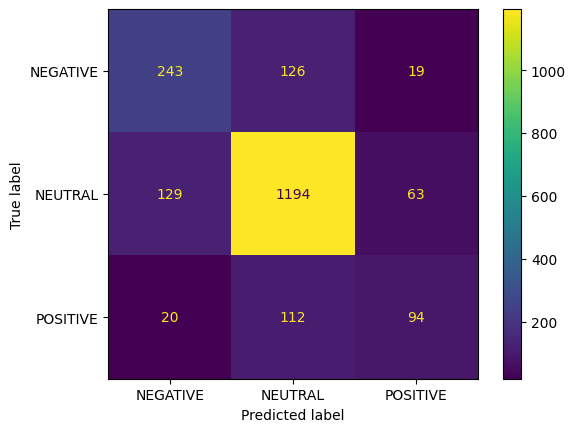

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)

disp.plot()

plt.show()

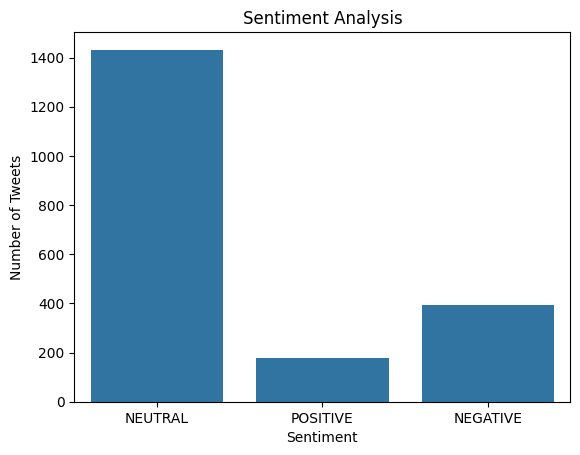

In [ ]:
#create bar graph
import matplotlib.pyplot as plt
import seaborn as sns


# create a barplot
sns.countplot(x='Sentiment', data= test_prediction_SVM)

# set the title
plt.title('Sentiment Analysis')

# set the x and y label
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')

# show the plot
plt.show()

In [ ]:
test_prediction_SVM['Sentiment'].value_counts()

,count
Sentiment,
NEUTRAL,1432
NEGATIVE,392
POSITIVE,176


In [ ]:
df2['Sentiment (Manual)'].value_counts()

,count
Sentiment (Manual),
NEUTRAL,1386
NEGATIVE,388
POSITIVE,226


Codes below is to calculate roc auc score and display graphs.

In [ ]:
n_samples, n_features = X_test_tfidf_vect.shape
n_classes = len(np.unique(y_test))
target_names = ['POSITIVE','NEGATIVE','NEUTRAL']

In [ ]:
y_score = model.fit(X_train_tfidf_vect, y_train).decision_function(X_test_tfidf_vect)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(2000, 3)

In [ ]:
label_binarizer.transform(["POSITIVE"])

array([[0, 0, 1]])

In [ ]:
class_of_interest = "POSITIVE"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

2

In [ ]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.90


In [ ]:
# store the fpr, tpr, and roc_auc for all averaging strategies
#fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")



Macro-averaged One-vs-Rest ROC AUC score:
0.84


Micro-averaged One-vs-Rest ROC AUC score:
0.90
Macro-averaged One-vs-Rest ROC AUC score:
0.84


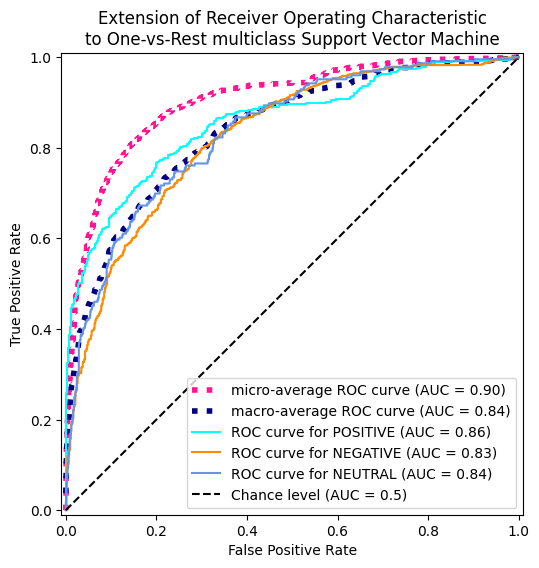

In [ ]:
from sklearn.metrics import auc, roc_curve
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import RocCurveDisplay

# Store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute ROC curve and ROC area for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")
print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

# Plotting
fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_score[:, i],
        name=f"ROC curve for {target_names[i]}",
        color=color,
        ax=ax,
        plot_chance_level=(i == 2),
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass Support Vector Machine",
)

plt.legend(loc="lower right")
plt.show()
